# Sentiment Analysis On Amazon Reviews

![TM](source/textMining.jpg)

## STEP1: Import Data From CSV

### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("source/reviews.csv")

### First Look

- Aim of this step have pre-info about dataset
- Start with a part of dataset to understand structure
- Think about columns and rows
- Learn which data types are using

In [3]:
df.shape

(568454, 10)

568454 rows, 10 columns

In [4]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


first 5 rows of df

In [5]:
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [6]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

all columns in df

In [7]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

variables types of columns

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,568454.0,2.842275e+05,1.640987e+05,1.0,1.421142e+05,2.842275e+05,4.263408e+05,5.684540e+05
HelpfulnessNumerator,568454.0,1.743817e+00,7.636513e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,8.660000e+02
HelpfulnessDenominator,568454.0,2.228810e+00,8.289740e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,9.230000e+02
Score,568454.0,4.183199e+00,1.310436e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,568454.0,1.296257e+09,4.804331e+07,939340800.0,1.271290e+09,1.311120e+09,1.332720e+09,1.351210e+09


basic statistics of our dataset

In [9]:
df["Text"][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

an example of review. It has stopwords and punctuation marks.

In [10]:
df["Text"][21]

'I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.<br />There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. <a href="http://www.amazon.com/gp/product/B001GVISJM">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>'

and it has numerical values that not necessary in sentiment analysis

## STEP2: Data Preprocessing

- Have information about null variables
- Question the outliers
- Catch duplicated rows
- Prepare data to text processing

![STEPS](source/steps.jpg)

### Missing Observation Analysis

In [11]:
df.isnull().values.any()

True

there is/are missing values

In [12]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

we have empty values in ProfileName and summary (our process those are unnecessary)

totally 43 NaN values

### Visualization Missing Values

In [13]:
import missingno as msno

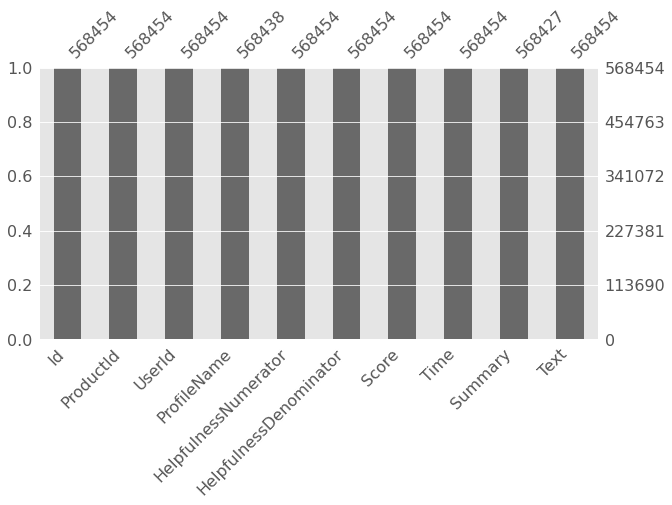

In [14]:
msno.bar(df, figsize=(10,5));

as you see in graph missing values are very few. It looks like there are no empty rows but we have

- IF I delete these empty values I lose every review text
- so, I will not delete. I dont need them sentiment analysis

### Outlier Analysis

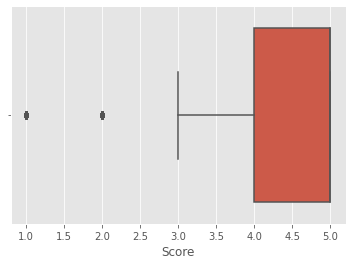

In [15]:
sns.boxplot(x=df["Score"]);

Score labels outliers. They do not looks outliers.
- scores are group between 4-5
- so hard that find outliers in df
- that's all about datasets structure

### Duplicated Value Analysis

In [16]:
df.duplicated().sum()

0

dulicated "row" count  

In [17]:
df["Summary"].duplicated().sum()

272711

## STEP3: Text Processing

- Focus on texts for processing
- Convert text to pandas dataframe (that's useful)
- Catch HTML tags and get rid of (in our case we don't need them)
- Remove punctuation marks
- Remove numeric values because those are not emotional
- Get lower case text to implement stopword process
- Remove stopwords
- Lemmatization

![TEXT](source/text.jpg)

### Import Dependencies

In [18]:
import nltk
from nltk.corpus import stopwords

from textblob import TextBlob
from textblob import Word

from nltk.stem import PorterStemmer

### Extract Text From Df

In [19]:
text = df["Text"].copy()

In [20]:
text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

### Vectorize Sentences

In [21]:
r = pd.Series(text)

In [22]:
reviews = pd.DataFrame(r)

In [23]:
reviews.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


### Delete HTML Tags

In [24]:
import re

In [25]:
reviews["Text"][21]

'I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.<br />There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. <a href="http://www.amazon.com/gp/product/B001GVISJM">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>'

there are html tags in text. useless for us.

In [26]:
re.sub('<.*?>', '', reviews["Text"][21])

'I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)'

In [27]:
reviews["Text"][220036]

'Thank you for having this product available to be purchased on Amazon.com. PLEASE DO NOT DISCONTINUE THIS PRODUCT FROM this website. If so, please let me know immediately so that I can purchase these candies. Please do not give out my personal contact or credit card information to other companies, especially without my personal permission or authorization to do so.<br />I am not sure about how to do this or whether I am even doing this correctly. Please explain this to me in a simple way for me to understand about this review process and how it works.<br /><br />Anna Mae Gardner'

In [28]:
re.sub('<.*?>','', reviews["Text"][220036])

'Thank you for having this product available to be purchased on Amazon.com. PLEASE DO NOT DISCONTINUE THIS PRODUCT FROM this website. If so, please let me know immediately so that I can purchase these candies. Please do not give out my personal contact or credit card information to other companies, especially without my personal permission or authorization to do so.I am not sure about how to do this or whether I am even doing this correctly. Please explain this to me in a simple way for me to understand about this review process and how it works.Anna Mae Gardner'

#### Define Remove Function

In [29]:
def removeTags(string):
    r = re.sub('<.*?>','', string)
    return r

In [30]:
removeTags(reviews["Text"][220036])

'Thank you for having this product available to be purchased on Amazon.com. PLEASE DO NOT DISCONTINUE THIS PRODUCT FROM this website. If so, please let me know immediately so that I can purchase these candies. Please do not give out my personal contact or credit card information to other companies, especially without my personal permission or authorization to do so.I am not sure about how to do this or whether I am even doing this correctly. Please explain this to me in a simple way for me to understand about this review process and how it works.Anna Mae Gardner'

In [31]:
withoutTags = reviews["Text"].apply(lambda x: removeTags(x))

apply all text

In [32]:
reviews = pd.DataFrame(withoutTags)

In [33]:
reviews["Text"][21]

'I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)'

In [34]:
reviews["Text"][220036]

'Thank you for having this product available to be purchased on Amazon.com. PLEASE DO NOT DISCONTINUE THIS PRODUCT FROM this website. If so, please let me know immediately so that I can purchase these candies. Please do not give out my personal contact or credit card information to other companies, especially without my personal permission or authorization to do so.I am not sure about how to do this or whether I am even doing this correctly. Please explain this to me in a simple way for me to understand about this review process and how it works.Anna Mae Gardner'

### Delete Numerical Values

In [35]:
removeNumerics = reviews["Text"].str.replace("\d","")

In [36]:
removeNumerics.tail()

568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give - of th...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, dtype: object

In [37]:
reviews = pd.DataFrame(removeNumerics)

In [38]:
reviews.tail()

,Text
568449,Great for sesame chicken..this is a good if no...
568450,I'm disappointed with the flavor. The chocolat...
568451,"These stars are small, so you can give - of th..."
568452,These are the BEST treats for training and rew...
568453,"I am very satisfied ,product is as advertised,..."


### Uppercase / Lowercase

- Elimination of differences between texts

In [39]:
reviews["Text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

0         i have bought several of the vitality canned d...
1         product arrived labeled as jumbo salted peanut...
2         this is a confection that has been around a fe...
3         if you are looking for the secret ingredient i...
4         great taffy at a great price. there was a wide...
                                ...                        
568449    great for sesame chicken..this is a good if no...
568450    i'm disappointed with the flavor. the chocolat...
568451    these stars are small, so you can give - of th...
568452    these are the best treats for training and rew...
568453    i am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

In [40]:
toLower = reviews["Text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [41]:
reviews = pd.DataFrame(toLower)
reviews.head()

,Text
0,i have bought several of the vitality canned d...
1,product arrived labeled as jumbo salted peanut...
2,this is a confection that has been around a fe...
3,if you are looking for the secret ingredient i...
4,great taffy at a great price. there was a wide...


### Stopwords

- Stop words are basically a set of commonly used words in any language
- Every language has stopwords


- Determiners: Determiners tend to mark nouns where a determiner usually will be followed by a noun (the, a, an, another)
- Coordinating conjunctions: Coordinating conjunctions connect words, phrases, and clauses (for, an, nor, but, or, yet, so)
- Prepositions: Prepositions express temporal or spatial relations (in, under, towards, before)


- All of them not represents emotions
- We not interest none emotional words or marks

The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead.

In [42]:
sw = stopwords.words('english')

In [43]:
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [44]:
reviews["Text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

0         bought several vitality canned dog food produc...
1         product arrived labeled jumbo salted peanuts.....
2         confection around centuries. light, pillowy ci...
3         looking secret ingredient robitussin believe f...
4         great taffy great price. wide assortment yummy...
                                ...                        
568449    great sesame chicken..this good better restura...
568450    i'm disappointed flavor. chocolate notes espec...
568451    stars small, give - one training session. trie...
568452    best treats training rewarding dog good groomi...
568453    satisfied ,product advertised, use cereal, raw...
Name: Text, Length: 568454, dtype: object

In [45]:
withoutSW = reviews["Text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [46]:
reviews = pd.DataFrame(withoutSW)
reviews.head()

,Text
0,bought several vitality canned dog food produc...
1,product arrived labeled jumbo salted peanuts.....
2,"confection around centuries. light, pillowy ci..."
3,looking secret ingredient robitussin believe f...
4,great taffy great price. wide assortment yummy...


### Delete Punctuation Marks

In [47]:
reviews.head()

,Text
0,bought several vitality canned dog food produc...
1,product arrived labeled jumbo salted peanuts.....
2,"confection around centuries. light, pillowy ci..."
3,looking secret ingredient robitussin believe f...
4,great taffy great price. wide assortment yummy...


In [48]:
reviews.tail()

,Text
568449,great sesame chicken..this good better restura...
568450,i'm disappointed flavor. chocolate notes espec...
568451,"stars small, give - one training session. trie..."
568452,best treats training rewarding dog good groomi...
568453,"satisfied ,product advertised, use cereal, raw..."


In [49]:
removeMarks = reviews["Text"].str.replace("[^\w\s]","")

In [50]:
removeMarks.tail()

568449    great sesame chickenthis good better resturant...
568450    im disappointed flavor chocolate notes especia...
568451    stars small give  one training session tried t...
568452    best treats training rewarding dog good groomi...
568453    satisfied product advertised use cereal raw vi...
Name: Text, dtype: object

In [51]:
reviews = pd.DataFrame(removeMarks)

In [52]:
reviews.tail()

,Text
568449,great sesame chickenthis good better resturant...
568450,im disappointed flavor chocolate notes especia...
568451,stars small give one training session tried t...
568452,best treats training rewarding dog good groomi...
568453,satisfied product advertised use cereal raw vi...


### Remove Infrecuent Words

In [53]:
infrequent = pd.Series(" ".join(reviews["Text"]).split()).value_counts()[-200000:]

In [54]:
infrequent.head()

icesnow           2
speakmmrammmrr    2
availableboth     2
twolegs           2
barbequeing       2
dtype: int64

In [55]:
infrequent.tail()

barehanded      1
ocasionsi       1
ctce            1
appetizeradd    1
nonlocal        1
dtype: int64

In [56]:
infrequent.shape

(200000,)

In [57]:
frequent = reviews["Text"].apply(lambda x: " ".join(x for x in x.split() if x not in infrequent))

In [58]:
frequent.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [59]:
reviews = pd.DataFrame(frequent)

In [60]:
reviews.head()

,Text
0,bought several vitality canned dog food produc...
1,product arrived labeled jumbo salted peanutsth...
2,confection around centuries light pillowy citr...
3,looking secret ingredient robitussin believe f...
4,great taffy great price wide assortment yummy ...


### Lemmatization

- The purpose of lemmatization is same as that of stemming but overcomes the drawbacks of stemming. In stemming, for some words, it may not give may not give meaningful representation such as “Histori”. Here, lemmatization comes into picture as it gives meaningful word

- Lemmatization takes more time as compared to stemming because it finds meaningful word/ representation

In [61]:
lemmatized  = reviews["Text"].apply(lambda x: " ".join([Word(i).lemmatize() for i in x.split()]))

In [62]:
lemmatized.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around century light pillowy citrus...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [63]:
lemmatized.tail()

568449    great sesame chickenthis good better resturant...
568450    im disappointed flavor chocolate note especial...
568451    star small give one training session tried tra...
568452    best treat training rewarding dog good groomin...
568453    satisfied product advertised use cereal raw vi...
Name: Text, dtype: object

In [64]:
lemmatized[220036]

'thank product available purchased amazoncom please discontinue product website so please let know immediately purchase candy please give personal contact credit card information company especially without personal permission authorization soi sure whether even correctly please explain simple way understand review process mae gardner'

In [65]:
reviews["Text"][220036]

'thank product available purchased amazoncom please discontinue product website so please let know immediately purchase candies please give personal contact credit card information companies especially without personal permission authorization soi sure whether even correctly please explain simple way understand review process mae gardner'

In [66]:
reviews = pd.DataFrame(lemmatized)

In [67]:
reviews.tail()

,Text
568449,great sesame chickenthis good better resturant...
568450,im disappointed flavor chocolate note especial...
568451,star small give one training session tried tra...
568452,best treat training rewarding dog good groomin...
568453,satisfied product advertised use cereal raw vi...


there are 100.000 infrequent words here. this amount change what value I want

## STEP4: Feature Engineering

### Part Of Speech Tagging

![POS](source/pos.jpg)

- POS is substructures of a sentence
- prepositions, verbs, nouns, adjectives etc..

In [68]:
from textblob import TextBlob

In [69]:
TextBlob(reviews["Text"][0]).tags

[('bought', 'VBD'),
 ('several', 'JJ'),
 ('vitality', 'NN'),
 ('canned', 'VBD'),
 ('dog', 'JJ'),
 ('food', 'NN'),
 ('product', 'NN'),
 ('found', 'VBD'),
 ('good', 'JJ'),
 ('quality', 'NN'),
 ('product', 'NN'),
 ('look', 'NN'),
 ('like', 'IN'),
 ('stew', 'NNS'),
 ('processed', 'VBN'),
 ('meat', 'NN'),
 ('smell', 'NN'),
 ('better', 'RBR'),
 ('labrador', 'NN'),
 ('finicky', 'JJ'),
 ('appreciates', 'VBZ'),
 ('product', 'NN'),
 ('better', 'RBR'),
 ('most', 'RBS')]

In [70]:
TextBlob("I am so happy").tags

[('I', 'PRP'), ('am', 'VBP'), ('so', 'RB'), ('happy', 'JJ')]

In [71]:
TextBlob("so I am happy").tags

[('so', 'RB'), ('I', 'PRP'), ('am', 'VBP'), ('happy', 'JJ')]

### Named Entity Recognition

In [72]:
from nltk import ne_chunk, word_tokenize, pos_tag

In [73]:
chunk = ne_chunk(pos_tag(word_tokenize(reviews["Text"][0])))

In [74]:
print(ne_chunk(pos_tag(word_tokenize(reviews["Text"][0]))))

(S
  bought/VBD
  several/JJ
  vitality/NN
  canned/VBD
  dog/JJ
  food/NN
  product/NN
  found/VBD
  good/JJ
  quality/NN
  product/NN
  look/NN
  like/IN
  stew/NNS
  processed/VBN
  meat/NN
  smell/NN
  better/RBR
  labrador/NN
  finicky/JJ
  appreciates/VBZ
  product/NN
  better/RBR
  most/RBS)


In [75]:
regEx = "NP: {<DT>?<JJ>*<NN>}"
rp = nltk.RegexpParser(regEx)
res = rp.parse(chunk)

In [76]:
print(res)

(S
  bought/VBD
  (NP several/JJ vitality/NN)
  canned/VBD
  (NP dog/JJ food/NN)
  (NP product/NN)
  found/VBD
  (NP good/JJ quality/NN)
  (NP product/NN)
  (NP look/NN)
  like/IN
  stew/NNS
  processed/VBN
  (NP meat/NN)
  (NP smell/NN)
  better/RBR
  (NP labrador/NN)
  finicky/JJ
  appreciates/VBZ
  (NP product/NN)
  better/RBR
  most/RBS)


### Feature Extraction

In [77]:
# find each review has how many letter
reviews["Text"].str.len()

0         166
1         135
2         282
3         137
4          83
         ... 
568449     93
568450    164
568451    238
568452    115
568453     68
Name: Text, Length: 568454, dtype: int64

In [78]:
# find each review has how many word
reviews["Text"].apply(lambda x: len(str(x).split(" ")))

0         24
1         18
2         41
3         20
4         13
          ..
568449    14
568450    26
568451    38
568452    18
568453     9
Name: Text, Length: 568454, dtype: int64

### Vader Sentiment Scoring

- Vader : Valence Aware Dictionary and Sentiment Reasoner

It is used for sentiment analysis of text which has both the polarities i.e. positive/negative. VADER is used to quantify how much of positive or negative emotion the text has and also the intensity of emotion.

- It does not require any training data.
- It can very well understand the sentiment of a text containing emoticons, slangs, conjunctions, capital words, punctuations and much more.
- It works excellent on social media text.
- VADER can work with multiple domains.

![POS](source/vader.jpg)

In [79]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [80]:
sia = SentimentIntensityAnalyzer()
sia

In [81]:
sia.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [82]:
sia.polarity_scores("I hate human who talks to much in vain")

{'neg': 0.52, 'neu': 0.48, 'pos': 0.0, 'compound': -0.7579}

In [83]:
reviews["Text"][0]

'bought several vitality canned dog food product found good quality product look like stew processed meat smell better labrador finicky appreciates product better most'

In [85]:
sia.polarity_scores(reviews["Text"][0])

{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.9413}

In [86]:
sia.polarity_scores(reviews["Text"][1])

{'neg': 0.129, 'neu': 0.762, 'pos': 0.11, 'compound': -0.1027}

#### Apply Scoring Whole Dataset

In [87]:
reviews = reviews.reset_index()

In [88]:
reviews.head()

,index,Text
0,0,bought several vitality canned dog food produc...
1,1,product arrived labeled jumbo salted peanutsth...
2,2,confection around century light pillowy citrus...
3,3,looking secret ingredient robitussin believe f...
4,4,great taffy great price wide assortment yummy ...


In [89]:
vader = reviews["Text"].apply(lambda x: sia.polarity_scores(x))

In [90]:
vader.head()

0    {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'comp...
1    {'neg': 0.129, 'neu': 0.762, 'pos': 0.11, 'com...
2    {'neg': 0.13, 'neu': 0.584, 'pos': 0.286, 'com...
3    {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp...
4    {'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'comp...
Name: Text, dtype: object

In [91]:
vaderDf = pd.DataFrame()
vaderDf["neg"] = vader.apply(lambda x: x.get("neg"))
vaderDf["neu"] = vader.apply(lambda x: x.get("neu"))
vaderDf["pos"] = vader.apply(lambda x: x.get("pos"))
vaderDf["compound"] = vader.apply(lambda x: x.get("compound"))

In [92]:
vaderDf.head()

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.130,0.584,0.286,0.8624
3,0.000,0.868,0.132,0.4404
4,0.000,0.369,0.631,0.9468


In [93]:
vaderDf.reset_index()

,index,neg,neu,pos,compound
0,0,0.000,0.517,0.483,0.9413
1,1,0.129,0.762,0.110,-0.1027
2,2,0.130,0.584,0.286,0.8624
3,3,0.000,0.868,0.132,0.4404
4,4,0.000,0.369,0.631,0.9468
...,...,...,...,...,...
568449,568449,0.000,0.420,0.580,0.9300
568450,568450,0.320,0.548,0.132,-0.7841
568451,568451,0.000,0.749,0.251,0.8860
568452,568452,0.059,0.243,0.697,0.9738


#### Concat Dataframes

In [94]:
vaderDf = pd.concat([reviews, vaderDf], axis=1, join='inner')

In [95]:
vaderDf.head()

,index,Text,neg,neu,pos,compound
0,0,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413
1,1,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027
2,2,confection around century light pillowy citrus...,0.130,0.584,0.286,0.8624
3,3,looking secret ingredient robitussin believe f...,0.000,0.868,0.132,0.4404
4,4,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468


In [96]:
vaderDf.tail()

,index,Text,neg,neu,pos,compound
568449,568449,great sesame chickenthis good better resturant...,0.000,0.420,0.580,0.9300
568450,568450,im disappointed flavor chocolate note especial...,0.320,0.548,0.132,-0.7841
568451,568451,star small give one training session tried tra...,0.000,0.749,0.251,0.8860
568452,568452,best treat training rewarding dog good groomin...,0.059,0.243,0.697,0.9738
568453,568453,satisfied product advertised use cereal raw vi...,0.000,0.741,0.259,0.4215


In [97]:
vaderDf.shape

(568454, 6)

In [98]:
vaders = pd.DataFrame()
vaders = pd.concat([vaderDf, df.Score], axis=1, join='inner')

In [99]:
vaders.head()

,index,Text,neg,neu,pos,compound,Score
0,0,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413,5
1,1,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027,1
2,2,confection around century light pillowy citrus...,0.130,0.584,0.286,0.8624,4
3,3,looking secret ingredient robitussin believe f...,0.000,0.868,0.132,0.4404,2
4,4,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468,5


#### Plot VADER Results

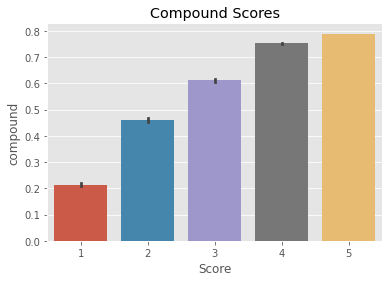

In [100]:
ax = sns.barplot(data=vaders, x = 'Score', y='compound')
ax.set_title("Compound Scores")
plt.show()

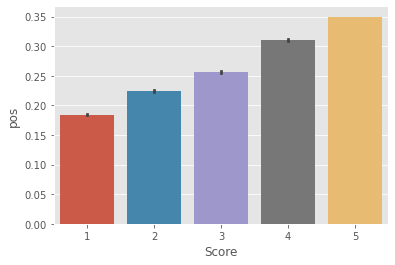

In [101]:
sns.barplot(data=vaders, x='Score', y='pos');

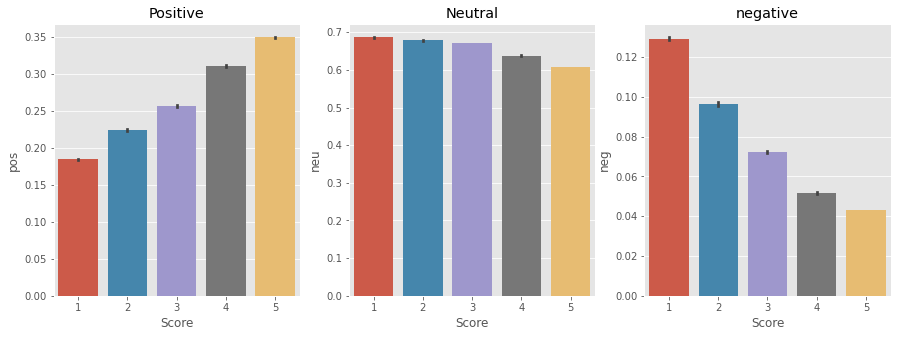

In [102]:
fig, axs = plt.subplots(1,3,figsize=(15, 5))
sns.barplot(data=vaders, x="Score", y="pos", ax=axs[0])
sns.barplot(data=vaders, x="Score", y="neu", ax=axs[1])
sns.barplot(data=vaders, x="Score", y="neg", ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("negative")
plt.show()

Neutral sentiment has very similar product scoring points as we wait.

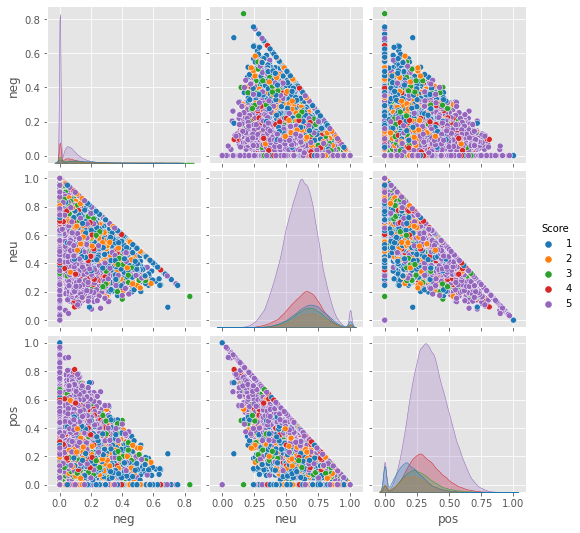

In [103]:
sns.pairplot(data=vaders, vars=["neg", "neu", "pos"], hue="Score", palette="tab10")
plt.show()

This graphic shows us how scoring distributions on sentiment. As you see we have 5 scored negative reviews or 1 scored positive sentiments.

### Visualization With WordCloud

Visualize more frequent words with wordcloud

In [104]:
from wordcloud import WordCloud

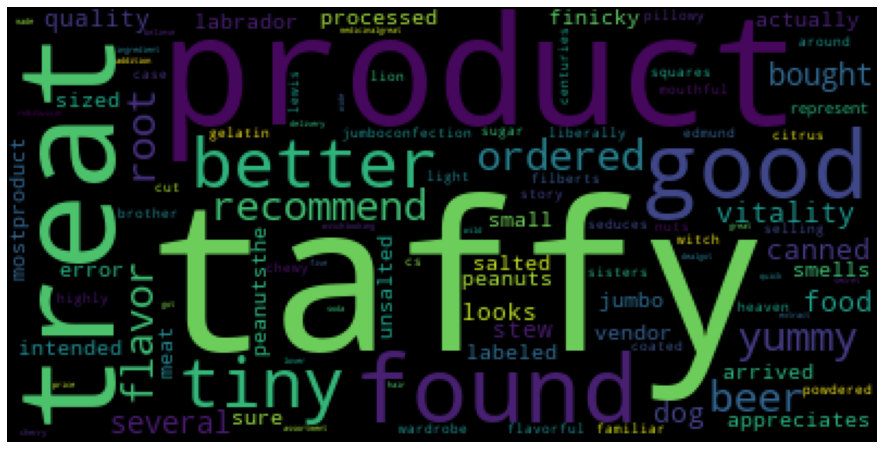

In [105]:
wc = WordCloud(min_font_size=4, max_words=100).generate(frequent[0] + frequent[1] + frequent[2] + frequent[3] + frequent[4] + frequent[5])
plt.figure(figsize=(16,8)) 
plt.imshow(wc)
plt.axis("off")
plt.show()

### Feature Methods

Machines cannot understand characters and words. So when dealing with text data we need to represent it in numbers to be understood by the machine.

#### Import Dependencies

In [2]:
from sklearn import decomposition, ensemble, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

### Encoding: Numeric Scoring & Categorization

The performance of a machine learning model not only depends on the model and the hyperparameters but also on how we process and feed different types of variables to the model. 
Since most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step.
We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information.

SScoring encoded, it means, it numerized instead of sentiment categorization.

In [107]:
vaders["SScoring"] = vaders["compound"].apply(lambda x: 0 if x< 0.25 else 1 if (x>= 0.25 and x<= 0.6) else 2)

In [108]:
vaders["Sentiment"] = vaders["compound"].apply(lambda x: "neg" if x< 0.25 else "neu" if (x>= 0.25 and x<= 0.6) else "pos")

In [109]:
vaders.head()

,index,Text,neg,neu,pos,compound,Score,SScoring,Sentiment
0,0,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413,5,2,pos
1,1,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027,1,0,neg
2,2,confection around century light pillowy citrus...,0.130,0.584,0.286,0.8624,4,2,pos
3,3,looking secret ingredient robitussin believe f...,0.000,0.868,0.132,0.4404,2,1,neu
4,4,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468,5,2,pos


In [110]:
vaders.tail()

,index,Text,neg,neu,pos,compound,Score,SScoring,Sentiment
568449,568449,great sesame chickenthis good better resturant...,0.000,0.420,0.580,0.9300,5,2,pos
568450,568450,im disappointed flavor chocolate note especial...,0.320,0.548,0.132,-0.7841,2,0,neg
568451,568451,star small give one training session tried tra...,0.000,0.749,0.251,0.8860,5,2,pos
568452,568452,best treat training rewarding dog good groomin...,0.059,0.243,0.697,0.9738,5,2,pos
568453,568453,satisfied product advertised use cereal raw vi...,0.000,0.741,0.259,0.4215,5,1,neu


### Export DF and Avoid Rerunning

Export VADER results for avoid rerunning whole notebook. It is created ones and use easily.

In [113]:
# vaders.to_csv(r'vaders.csv', index=False, header=True)

In [3]:
vaders = pd.read_csv('vaders.csv')

import csv file 

### Train & Test Decomposition

On supervised learning we need to train algorithms with datasets train part and testing that trained dataset.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(vaders["Text"], vaders["SScoring"], test_size=0.25, random_state=1)

In [5]:
x_train.head()

376903    dog usually eat anything vomited hour period f...
445243    excited find item since lipton changed recipe ...
226194    salt hickory smoked sea salt durango great bbq...
456411    ideal rack kcups especially good limited count...
327413    son month old starting spitting regular enfami...
Name: Text, dtype: object

In [6]:
y_train.head()

376903    0
445243    2
226194    2
456411    2
327413    1
Name: SScoring, dtype: int64

### Count Vectors

 It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, 
 and we wish to convert each word in each text into vectors (for using in further text analysis).

- Countvectorizer is a method to convert text to numerical data.
- The text transforms to a sparse matrix.
- Machine learning algorithms cannot work with raw text directly. Rather, the text must be converted into vectors of numbers. In natural language processing, 
a common technique for extracting features from text is to place all of the words that occur in the text in a bucket.

In [5]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train.values.astype('U'))

CountVectorizer()

In [6]:
x_train_count = vectorizer.transform(x_train.values.astype('U'))
x_test_count = vectorizer.transform(x_test.values.astype('U'))

In [19]:
vectorizer.get_feature_names()[10:15]

['_can_', '_exactly_', '_finally_', '_i', '_i_']

In [7]:
np.asarray(x_train_count)

array(<426340x100315 sparse matrix of type '<class 'numpy.int64'>'
	with 14410624 stored elements in Compressed Sparse Row format>,
      dtype=object)

### TF-IDF

Tf-Idf are numerical statistics: Term frequency(tf) and inverse document frequency(idf) are shows that a word how important on the document.


- Tf(t) = The number of times a word appears in a document divded by the total number of words in the document. Every document has its own term frequency
- IDF(t) = The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus
- It can be defined as the calculation of how relevant a word in a series or corpus is to a text.
- OR How to find meaning of sentences and documents.


- I found another explaining => Tf-Idf is a technique which is used to find meaning of sentences consisting of words and cancels out the incapabilities of Bag of Words technique which is good for text classification or for helping a machine read words in numbers.

![TFIDF](source/tfidf.jpg)

In [5]:
tf_idf_word_vectorizer = TfidfVectorizer()

#### custom n-gram level

Wikipedia defines an N-Gram as “A contiguous sequence of N items from a given sample of text or speech”.

- Here an item can be a character(char level), a word or a sentence and N can be any integer. When N is 2, we call the sequence a bigram. Similarly, a sequence of 3 items is called a trigram, and so on.
- The N-Gram model is one of the best sentence-to-vector models, since it utilizes the context between N-words in a sentence.

In [6]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range = (1,2))
tf_idf_ngram_vectorizer.fit(x_train.apply(lambda x: np.str_(x)))

TfidfVectorizer(ngram_range=(1, 2))

In [120]:
tf_idf_ngram_vectorizer.get_feature_names()[10:15]

['___ instead water_',
 '___ this',
 '___ this bit',
 '___ variety',
 '___ variety calculated']

In [7]:
x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(x_train.apply(lambda x: np.str_(x)))
x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(x_test.apply(lambda x: np.str_(x)))

#### word level n_gram

In [8]:
tf_idf_word_vectorizer.fit(x_train.apply(lambda x: np.str_(x)))

TfidfVectorizer()

In [9]:
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(x_train.apply(lambda x: np.str_(x)))
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(x_test.apply(lambda x: np.str_(x)))

In [124]:
tf_idf_word_vectorizer.get_feature_names()[10:15]

['_absolutely', '_add_', '_after_', '_alicia', '_always_']

In [10]:
np.asarray(x_train_tf_idf_word)

array(<426340x100315 sparse matrix of type '<class 'numpy.float64'>'
	with 14410624 stored elements in Compressed Sparse Row format>,
      dtype=object)

#### charachter level n_gram

In [11]:
tf_idf_chars_vectorizer = TfidfVectorizer(analyzer="char", ngram_range=(1,2))
tf_idf_chars_vectorizer.fit(x_train.apply(lambda x: np.str_(x)))

TfidfVectorizer(analyzer='char', ngram_range=(1, 2))

In [127]:
tf_idf_chars_vectorizer.get_feature_names()[10:15]

[' _i', ' _k', ' _l', ' _m', ' _n']

In [12]:
x_train_tf_idf_chars = tf_idf_chars_vectorizer.transform(x_train.apply(lambda x: np.str_(x)))
x_test_tf_idf_chars = tf_idf_chars_vectorizer.transform(x_test.apply(lambda x: np.str_(x)))

### Export Vectorizers For Run Another Platforms

In [13]:
from scipy import sparse, io

#### Count Vectorizer Export

In [38]:
io.mmwrite("x_train_count", x_train_count)

In [46]:
io.mmwrite("x_test_count", x_test_count)

#### TF-IDF Exports

##### n_gram level

In [14]:
io.mmwrite("x_train_tf_idf_ngram", x_train_tf_idf_ngram)

In [15]:
io.mmwrite("x_test_tf_idf_ngram", x_test_tf_idf_ngram)

##### word level

In [16]:
io.mmwrite("x_train_tf_idf_word", x_train_tf_idf_word)

In [17]:
io.mmwrite("x_test_tf_idf_word", x_test_tf_idf_word)

##### character level

In [18]:
io.mmwrite("x_train_tf_idf_chars", x_train_tf_idf_chars)

In [19]:
io.mmwrite("x_test_tf_idf_chars", x_test_tf_idf_chars)

In [41]:
# import vectorizers
#b = io.mmread('x_train_count.mtx')